In [66]:
import pandas as pd  
import numpy as np  
import matplotlib.pyplot as plt  
import seaborn as seabornInstance 

from sklearn.model_selection import train_test_split 
from scipy.stats import pearsonr

from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler

from sklearn import metrics
import statsmodels.api as sm

#Just for dark theme
from jupyterthemes import jtplot
jtplot.style()

%matplotlib inline

In [45]:
dataset = pd.read_csv("toehold_data.csv")
dataset.head()

,GC_stem_top,GC_stem_bottom,preRBS_length,toehold_length,MFE,AU_rich_RBS,on_off_ed
0,0,2,12,27,-19.8,1,264.6
1,0,2,9,26,-23.7,0,192.4
2,1,2,7,22,-22.5,1,153.4
3,0,3,4,16,-20.7,1,44.7
4,3,1,5,16,-23.2,1,40.5


Normalize Data

In [72]:
x = dataset.loc[:, dataset.columns!='on_off_ed'].values
y = dataset['on_off_ed'].values

x = StandardScaler().fit_transform(x)

[[  0.    2.   12.   27.  -19.8   1. ]
 [  0.    2.    9.   26.  -23.7   0. ]
 [  1.    2.    7.   22.  -22.5   1. ]
 ...
 [  0.    2.    8.   24.  -20.5   1. ]
 [  0.    2.    9.   23.  -22.4   1. ]
 [  3.    2.    4.   16.  -22.2   1. ]]
[[-1.07920792  0.29934313  3.11816222  2.29523094  1.48969543  1.08661074]
 [-1.07920792  0.29934313  1.98485427  2.14339    -0.11405019 -0.92029277]
 [-0.18316832  0.29934313  1.22931563  1.53602626  0.37941     1.08661074]
 ...
 [-1.07920792  0.29934313  1.60708495  1.83970813  1.20184365  1.08661074]
 [-1.07920792  0.29934313  1.98485427  1.6878672   0.42053168  1.08661074]
 [ 1.60891089  0.29934313  0.09600767  0.62498065  0.50277505  1.08661074]]


In [15]:
X = dataset.drop(['on_off_ed'],axis=1)
# X = dataset.drop(['GC_stem_bottom'],axis=1)
Y = dataset['on_off_ed']

X.describe()

,GC_stem_top,GC_stem_bottom,preRBS_length,toehold_length,MFE,AU_rich_RBS
count,181.000000,181.000000,181.000000,181.000000,181.000000,181.000000
mean,1.204420,1.679558,3.745856,11.883978,-23.422652,0.458564
std,1.119118,1.073453,2.654461,6.604108,2.438553,0.499662
min,0.000000,0.000000,1.000000,5.000000,-28.800000,0.000000
25%,0.000000,1.000000,2.000000,7.000000,-25.200000,0.000000
50%,1.000000,2.000000,3.000000,10.000000,-23.200000,0.000000
75%,2.000000,3.000000,5.000000,15.000000,-21.500000,1.000000
max,3.000000,3.000000,12.000000,30.000000,-18.700000,1.000000


In [16]:
Y.describe()

count    181.000000
mean      67.382875
std      118.489079
min        0.600400
25%        6.800000
50%       19.900000
75%       57.100000
max      665.000000
Name: on_off_ed, dtype: float64

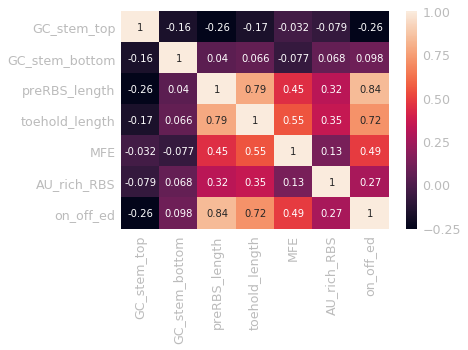

In [18]:
corr = dataset.corr()
seabornInstance.heatmap(corr,xticklabels=corr.columns,yticklabels=corr.columns,annot=True)

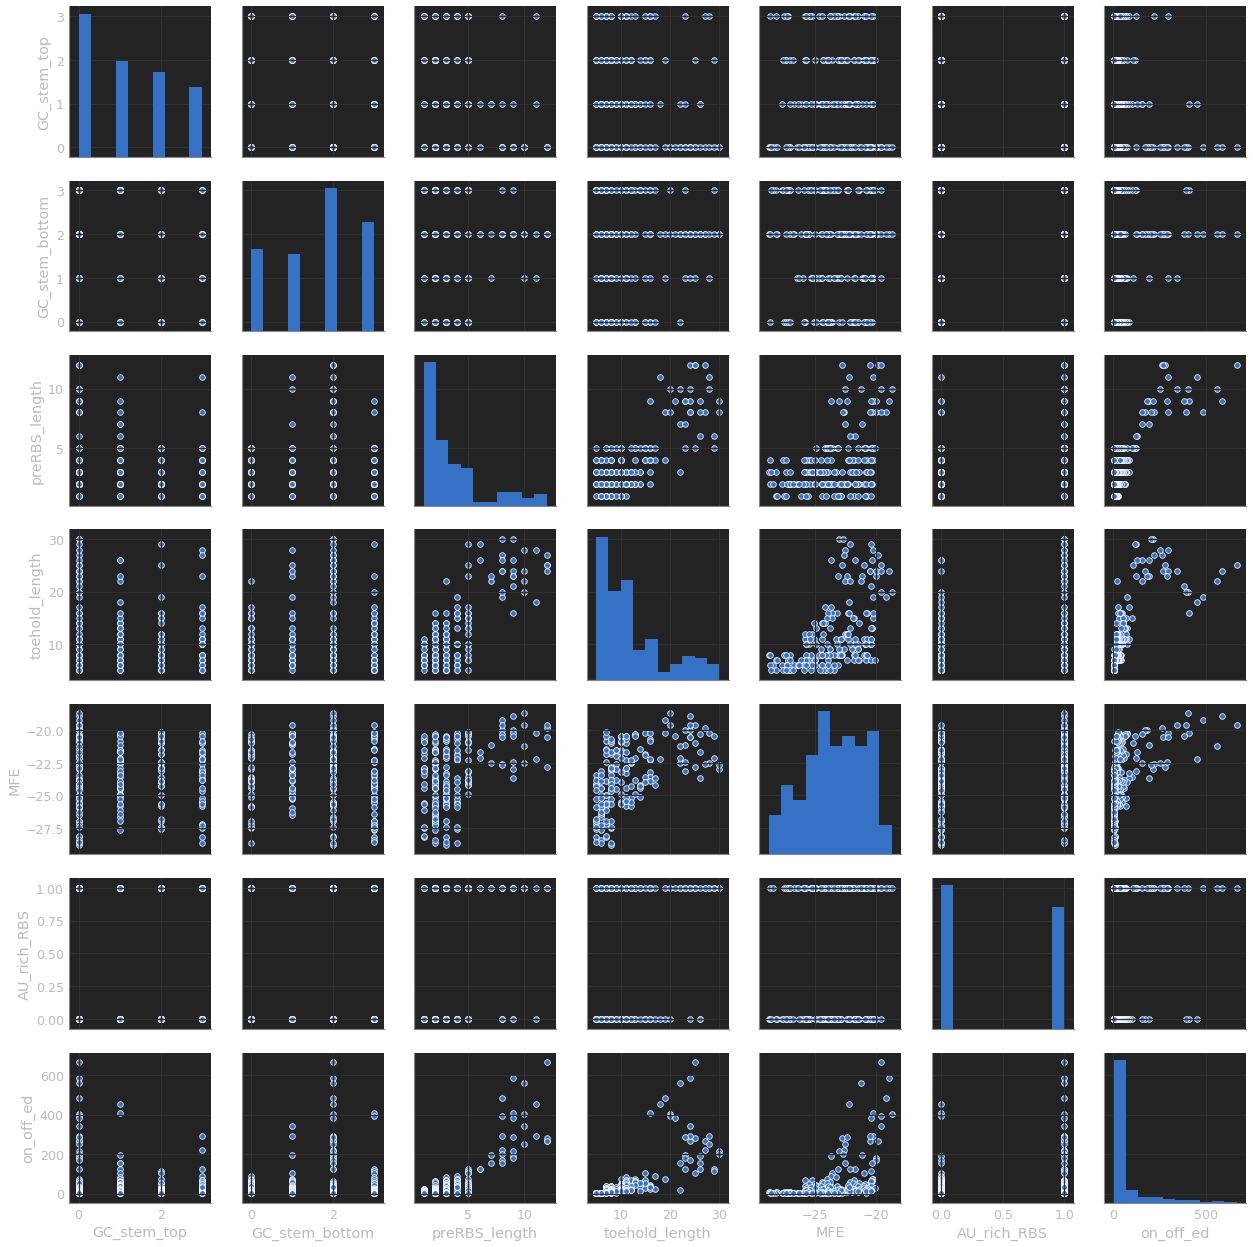

In [19]:
seabornInstance.pairplot(dataset)

In [20]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.1, random_state=0)

Linear Regression

In [21]:
regressor = LinearRegression(normalize=True)  
regressor.fit(X_train, Y_train)
Y_pred = regressor.predict(X_test)
r2 = regressor.score(X_test,Y_test)
rms = np.sqrt(metrics.mean_squared_error(Y_test,Y_pred))

In [22]:
linear = pd.DataFrame({'Actual': Y_test, 'Predicted': Y_pred})
linear.head()

,Actual,Predicted
83,22.5,-22.266593
7,33.8,112.055586
61,48.3,53.090033
176,381.0,273.343402
137,3.2,-15.177834


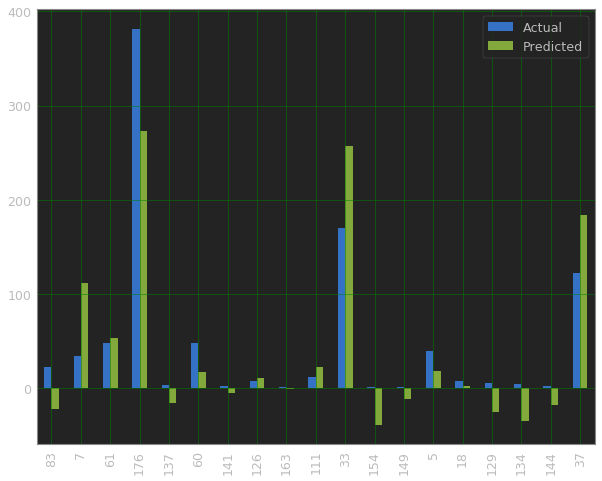

Mean Absolute Error: 32.881719524105854
Mean Squared Error: 1981.9988751657986
Root Mean Squared Error: 44.51964594609664


In [24]:
linear.plot(kind='bar',figsize=(10,8))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()
print('Mean Absolute Error:', metrics.mean_absolute_error(Y_test,Y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(Y_test,Y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(Y_test,Y_pred)))

Polynomial Regression

In [76]:
for x in range(1,10):
    poly = PolynomialFeatures(degree=x)

    X_train_quad = poly.fit_transform(X_train)
    X_test_quad = poly.fit_transform(X_test)

    model = LinearRegression()
    model.fit(X_train_quad, Y_train)

    Y_pred = model.predict(X_test_quad)
    r2 = model.score(X_test_quad,Y_test)
    rmse = np.sqrt(metrics.mean_squared_error(Y_test,Y_pred))
    mae = metrics.mean_absolute_error(Y_test,Y_pred)
    print("Degree : ",x,"\tR^2 : ",r2,"\tRMSE: ",rmse,"\tMAE: ",mae)

Degree :  1 	R^2 :  0.754168340865917 	RMSE:  44.51964594609663 	MAE:  32.881719524105826
Degree :  2 	R^2 :  0.8394122727185516 	RMSE:  35.98230426479746 	MAE:  25.572984554893093
Degree :  3 	R^2 :  0.7891186994092199 	RMSE:  41.23365486023815 	MAE:  29.077806733783927
Degree :  4 	R^2 :  -65.75880480684309 	RMSE:  733.6468752517214 	MAE:  469.53474803074624
Degree :  5 	R^2 :  -89.90897016836473 	RMSE:  856.1230001479306 	MAE:  348.90379848528585
Degree :  6 	R^2 :  -18.229459226744634 	RMSE:  393.74615991631276 	MAE:  208.90858392420566
Degree :  7 	R^2 :  -43.34678762048427 	RMSE:  597.9486348730279 	MAE:  270.2506585687683
Degree :  8 	R^2 :  -47.513042363443354 	RMSE:  625.4060112428224 	MAE:  266.54350408110736
Degree :  9 	R^2 :  -29.189467030882092 	RMSE:  493.3561186271333 	MAE:  216.04923675468208


In [27]:
X = sm.add_constant(X)
model = sm.OLS(Y,X).fit()
model.summary()

/home/vathsan/anaconda3/envs/toehold/lib/python3.7/site-packages/numpy/core/fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              on_off_ed   R-squared:                       0.733
Model:                            OLS   Adj. R-squared:                  0.724
Method:                 Least Squares   F-statistic:                     79.54
Date:                Tue, 17 Sep 2019   Prob (F-statistic):           2.89e-47
Time:                        15:05:33   Log-Likelihood:                -1001.1
No. Observations:                 181   AIC:                             2016.
Df Residuals:                     174   BIC:                             2039.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const             77.4847     60.822      1.274      0.204     -42.559     197.529
GC_stem_top       -4.9351      4.364     -1.131      0.260     -13.548       3.678
GC_stem_bottom     7.5309      4.432      1.699      0.091      -1.216      16.277
preRBS_length     31.8194      2.923     10.885      0.000      26.050      37.589
toehold_length     1.3424      1.253      1.071      0.285      -1.131       3.815
MFE                6.4221      2.311      2.779      0.006       1.860      10.984
AU_rich_RBS       -3.3293      9.998     -0.333      0.740     -23.061      16.403
==============================================================================
Omnibus:                       89.133   Durbin-Watson:                   0.756
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              472.332
Skew:                           1.811   Prob(JB):                    2.72e-103
Kurtosis:                      10.036   Cond. No.                         352.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""